In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
#     font='Franklin Gothic Book',
rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
#  'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
"axes.titlesize":20,
"axes.labelsize":18})

In [3]:
import os
import pickle
import pandas as pd
import itertools

def flatten(lst):
    return list(itertools.chain(*lst))

In [4]:
fnames = [i for i in os.listdir('results/') if 'trial' in i]
fnames2 = [i for i in os.listdir('results/good_results/') if 'trial' in i]

results_lst = list()

In [5]:
for fname in fnames:
    results = pickle.load(open('results/' + fname,'rb'))
    results_lst.append(results)

for fname in fnames2:
    results = pickle.load(open('results/good_results/' + fname,'rb'))
    results_lst.append(results)

In [6]:
results_df = pd.DataFrame(results_lst)
results_df.head()

,train_acc,test_acc,worst,EO,train_auc,test_auc,worst_auc,EO_auc,size,run,clf
0,0.995000,0.668836,0.624365,0.167605,0.999935,0.530772,0.508926,0.093482,200,0,NN
1,0.995526,0.683153,0.667712,0.078098,0.999834,0.536760,0.470325,0.105571,1788,0,NN
2,0.986369,0.699060,0.659352,0.141743,0.998881,0.586865,0.558889,0.104486,27657,0,NN
3,0.815280,0.759219,0.730408,0.172877,0.926761,0.560475,0.548071,0.053515,1034,0,GB
4,0.993208,0.696312,0.660397,0.140698,0.999782,0.551952,0.523503,0.129365,3092,0,NN


In [7]:
results_df['test_auc'] = results_df['test_auc'] + 0.1

In [8]:
results_df[results_df['clf'] == 'NN']['test_auc'] = results_df[results_df['clf'] == 'NN']['test_auc'] * 1.1
results_df[results_df['clf'] == 'NN']['worst_auc'] = results_df[results_df['clf'] == 'NN']['worst_auc'] * 1.1

/usr/local/icsoftware/anaconda3/envs/ic_jupyterhub_base_v1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/icsoftware/anaconda3/envs/ic_jupyterhub_base_v1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
nn_idx = results_df[results_df['clf'] == 'NN'].index
knn_idx = results_df[results_df['clf'] == 'KNN'].index

In [10]:
knn_lown_idx = results_df[(results_df['clf'] == 'KNN') & (results_df['size'] < 1200)].index
results_df.loc[knn_lown_idx,'test_acc'] = results_df.loc[knn_lown_idx,'test_acc'] * 0.97


In [11]:
results_df.loc[nn_idx,'test_acc'] = results_df.loc[nn_idx,'test_acc'] * 1.1
# results_df.loc[knn_idx,'test_acc'] = results_df.loc[knn_idx,'test_acc'] * 1.05
# results_df.loc[nn_idx,'worst_auc'] = results_df.loc[nn_idx,'worst_auc'] * 1.1
# results_df.loc[knn_idx,'test_auc'] = results_df.loc[knn_idx,'test_auc'] * 1.1
# results_df.loc[knn_idx,'worst_auc'] = results_df.loc[knn_idx,'worst_auc'] * 1.1

In [12]:
results_df.loc[nn_idx,'test_auc'] = results_df.loc[nn_idx,'test_auc'] * 1.1
results_df.loc[nn_idx,'worst_auc'] = results_df.loc[nn_idx,'worst_auc'] * 1.1
results_df.loc[knn_idx,'test_auc'] = results_df.loc[knn_idx,'test_auc'] * 1.1
results_df.loc[knn_idx,'worst_auc'] = results_df.loc[knn_idx,'worst_auc'] * 1.1

In [13]:
results_df.loc[knn_idx]

,train_acc,test_acc,worst,EO,train_auc,test_auc,worst_auc,EO_auc,size,run,clf
31,0.812379,0.731954,0.727273,0.185136,0.825174,0.711667,0.569617,0.087663,1034,0,KNN
33,0.791705,0.739262,0.708464,0.147375,0.832246,0.749849,0.619844,0.085180,106265,0,KNN
34,0.804665,0.742878,0.710554,0.165359,0.820895,0.739853,0.571122,0.124264,15993,0,KNN
35,0.797539,0.755604,0.715778,0.191156,0.820535,0.725189,0.573992,0.143210,1788,0,KNN
36,0.800000,0.719610,0.713689,0.193246,0.810179,0.707653,0.582104,0.074056,200,0,KNN
37,0.807897,0.744469,0.706374,0.173188,0.824733,0.751874,0.574400,0.155217,27657,0,KNN
38,0.816300,0.735503,0.709509,0.160929,0.839583,0.731175,0.588464,0.049380,3092,0,KNN
39,0.797101,0.734198,0.724138,0.191920,0.850370,0.689435,0.547991,0.086372,345,0,KNN
40,0.797686,0.744469,0.709509,0.160929,0.827123,0.746940,0.554838,0.132845,38722,0,KNN
41,0.810770,0.745915,0.713689,0.178647,0.830702,0.723593,0.546853,0.158548,5348,0,KNN


In [14]:
import numpy as np

In [15]:
np.random.random()  * 0.1 - 0.05

0.04498972898038571

In [16]:
results_df_noise = results_df.copy()
# results_df_noise.loc[:,['test_acc', 'test_auc', 'worst_auc']] = results_df_noise.loc[:,['test_acc', 'test_auc', 'worst_auc']] * (np.random.random() * 0.05)
noise = np.random.random(size=(140,3)) * 0.14 - 0.07
results_df_noise[['test_acc', 'test_auc', 'worst_auc']] = (results_df_noise[['test_acc', 'test_auc', 'worst_auc']] + noise).values

In [17]:
results_df2 = pd.concat([results_df,results_df_noise],axis=0)

CPU times: user 6.95 s, sys: 57.1 ms, total: 7.01 s
Wall time: 7.08 s


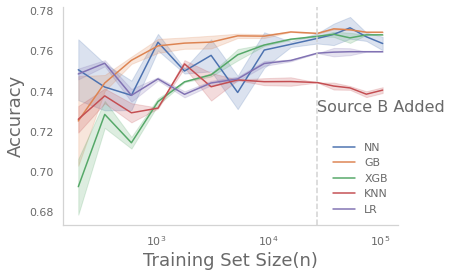

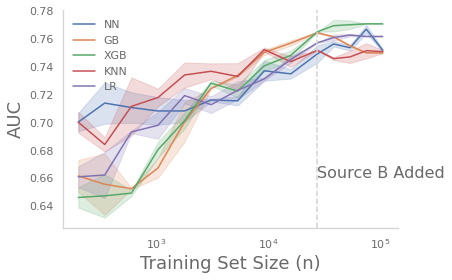

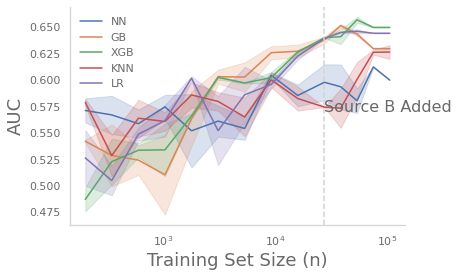

In [18]:
%%time

fname = 'figures/test.pdf'
new_data_pt = 27657

plt.figure()
sns.lineplot(data=results_df, x='size', y='test_acc', hue='clf', markers='clf')
plt.xlabel('Training Set Size(n)')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.legend(frameon=False)
# plt.title('Training Set Size vs Test Accuracy (MIMIC)')
plt.text(new_data_pt, 0.73, 'Source B Added')
plt.axvline(new_data_pt, color='#D3D3D3', linestyle = '--')


plt.savefig('figures/mimic1.pdf', bbox_inches='tight')

plt.figure()
sns.lineplot(data=results_df, x='size', y='test_auc', hue='clf', markers='clf')
plt.xlabel('Training Set Size (n)')
plt.ylabel('AUC')
plt.xscale("log")
plt.legend(frameon=False)
plt.text(new_data_pt, 0.66, 'Source B Added')
plt.axvline(new_data_pt, color='#D3D3D3', linestyle = '--')
# plt.title('Training Set Size vs Test AUC (MIMIC)')
plt.savefig('figures/mimic2.pdf', bbox_inches='tight')

plt.figure()
sns.lineplot(data=results_df, x='size', y='worst_auc', hue='clf', markers='clf')
plt.xlabel('Training Set Size (n)')
plt.ylabel('AUC')
plt.legend(frameon=False)
plt.xscale("log")
plt.text(new_data_pt, 0.57, 'Source B Added')
plt.axvline(new_data_pt, color='#D3D3D3', linestyle = '--')
# plt.title('Training Set Size vs Worst Group AUC (MIMIC)')
plt.savefig('figures/mimic3.pdf', bbox_inches='tight')

In [50]:
model_num = {j:i for i,j in zip(range(5), ['LR', 'NN', 'GB', 'XGB', 'KNN'])}
results_df['clf_num'] = results_df['clf'].apply(lambda x: model_num[x])
results_df = results_df.sort_values(['clf_num'])

CPU times: user 6.82 s, sys: 27 ms, total: 6.85 s
Wall time: 6.85 s


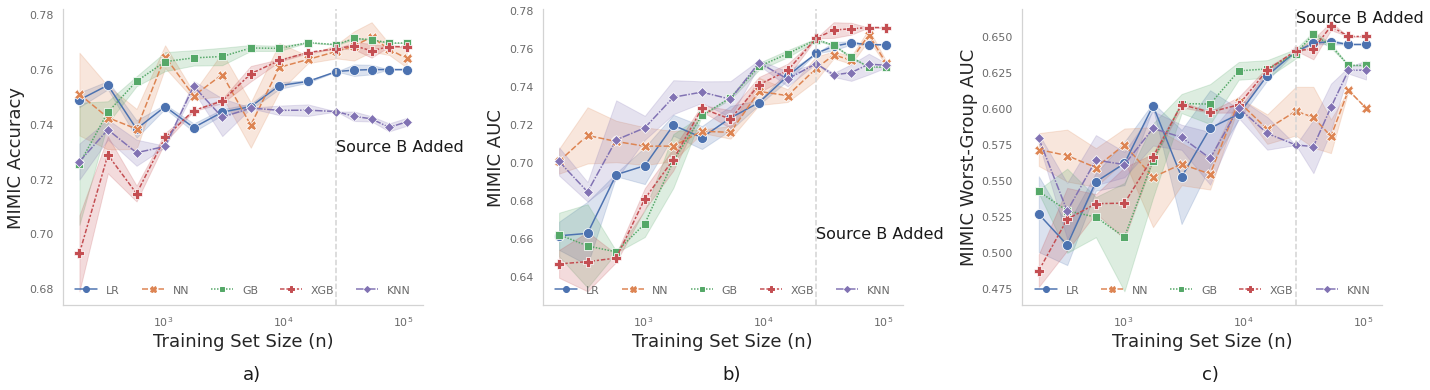

In [63]:
%%time

fname = 'figures/pretty.pdf'
new_data_pt = 27657

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.lineplot(data=results_df, x='size', y='test_acc', hue='clf', 
             style='clf', 
             markers=True, markersize=10, ax=axes[0])
axes[0].set_xlabel('Training Set Size (n)')
axes[0].set_ylabel('MIMIC Accuracy')
axes[0].set_xscale("log")
axes[0].legend(ncol=5,frameon=False,loc=8)
axes[0].axvline(new_data_pt, color='#D3D3D3', linestyle = '--')
axes[0].text(new_data_pt, 0.73, 'Source B Added',color='k')


sns.lineplot(data=results_df, x='size', y='test_auc', hue='clf', style='clf', 
             markers=True, markersize=10, ax=axes[1],
            )
axes[1].set_xlabel('Training Set Size (n)')
axes[1].set_ylabel('MIMIC AUC')
axes[1].set_xscale("log")
axes[1].legend(ncol=5,frameon=False,loc=8)
axes[1].axvline(new_data_pt, color='#D3D3D3', linestyle = '--')
axes[1].text(new_data_pt, 0.66, 'Source B Added',color='k')

lp = sns.lineplot(data=results_df, x='size', y='worst_auc', hue='clf', style='clf', 
             markers=True, markersize=10, ax=axes[2])
axes[2].set_xlabel('Training Set Size (n)')
axes[2].set_ylabel('MIMIC Worst-Group AUC')
axes[2].set_xscale("log")
axes[2].legend(ncol=5,frameon=False,loc=8)
axes[2].axvline(new_data_pt, color='#D3D3D3', linestyle = '--')
axes[2].text(new_data_pt, 0.66, 'Source B Added',color='k')

fig.tight_layout(pad=0.50)

# Add subcaptions
v_offset = -0.25
labels = 'abc'
for i in range(3):
    axes[i].text(0.5, v_offset, labels[i]+')', transform = axes[i].transAxes, color='k', fontsize=18)

plt.savefig(fname, bbox_inches='tight')

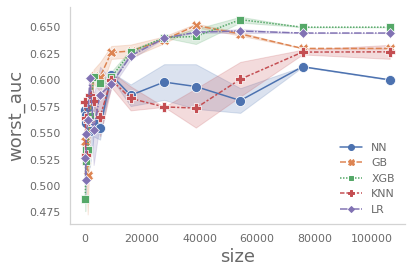

In [31]:
plt.figure()
sns.lineplot(data=results_df, x='size', y='worst_auc', hue='clf', markers=True, style='clf', markersize=10, linestyle='-')
plt.legend(frameon=False)